In [37]:
!pip install pandas
!pip install numpy
!pip install matplotlib
!pip install seaborn

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
#importing the data and overview 
train_df= pd.read_csv('train.csv')

In [5]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [29]:
# train_df.info()

In [7]:
train_df.shape

(891, 12)

In [8]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [9]:
train_df['Survived'].value_counts()

# survived = 1
# didn't survive = 0

0    549
1    342
Name: Survived, dtype: int64

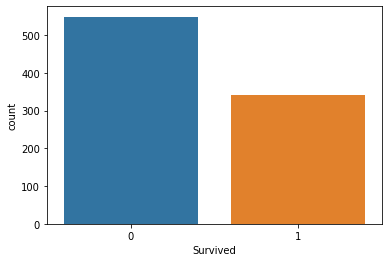

In [31]:
sns.countplot(data=train_df, x='Survived')

# survived = 1
# didn't survive = 0

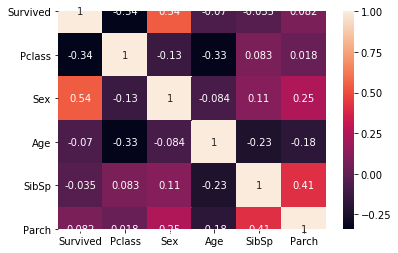

In [32]:
sns.heatmap(train_df.corr(), annot=True)

In [12]:
#Data preparation
#looking for null values and taking care of them

train_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [13]:
train_df["Age"].fillna(train_df["Age"].mean(), inplace = True)

In [14]:
train_df['Sex']=train_df['Sex'].replace('male', 0)
train_df['Sex']=train_df['Sex'].replace('female', 1)

In [15]:
train_df.drop(['Name', 'PassengerId', 'Fare', 'Ticket','Embarked', 'Cabin'], axis = 1, inplace = True)

In [16]:
train_df.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
dtype: int64

In [17]:
missing=train_df.isnull().sum().sort_values(ascending=False)
missing=missing.drop(missing[missing==0].index)
missing

Series([], dtype: int64)

In [18]:
#defining features and the label

X= train_df.drop('Survived', axis=1)
y= train_df['Survived']

In [34]:
X.head()

,Pclass,Sex,Age,SibSp,Parch
0,3,0,22.0,1,0
1,1,1,38.0,1,0
2,3,1,26.0,0,0
3,1,1,35.0,1,0
4,3,0,35.0,0,0


In [36]:
y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [19]:
#spliting the dataset to work on train and test

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [20]:
#feature scaling

from sklearn.preprocessing import StandardScaler

scaler= StandardScaler()
scaler.fit(X_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [21]:
scaled_X_train= scaler.transform(X_train)
scaled_X_test= scaler.transform(X_test)

In [22]:
#training the model


from sklearn.tree import DecisionTreeClassifier

decisiontree_model = DecisionTreeClassifier()
decisiontree_model.fit(scaled_X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [23]:
#predicting test

y_pred = decisiontree_model.predict(scaled_X_test)

In [24]:
#testing the model

from sklearn.metrics import confusion_matrix,classification_report

confusion_matrix(y_test,y_pred)

array([[134,  20],
       [ 34,  80]])

In [25]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.80      0.87      0.83       154
           1       0.80      0.70      0.75       114

    accuracy                           0.80       268
   macro avg       0.80      0.79      0.79       268
weighted avg       0.80      0.80      0.80       268



In [26]:
decisiontree_model.feature_importances_

array([0.13373739, 0.38546653, 0.33377093, 0.09396959, 0.05305555])

In [27]:
pd.DataFrame(index=X.columns,data=decisiontree_model.feature_importances_,columns=['Feature Importance'])

,Feature Importance
Pclass,0.133737
Sex,0.385467
Age,0.333771
SibSp,0.093970
Parch,0.053056


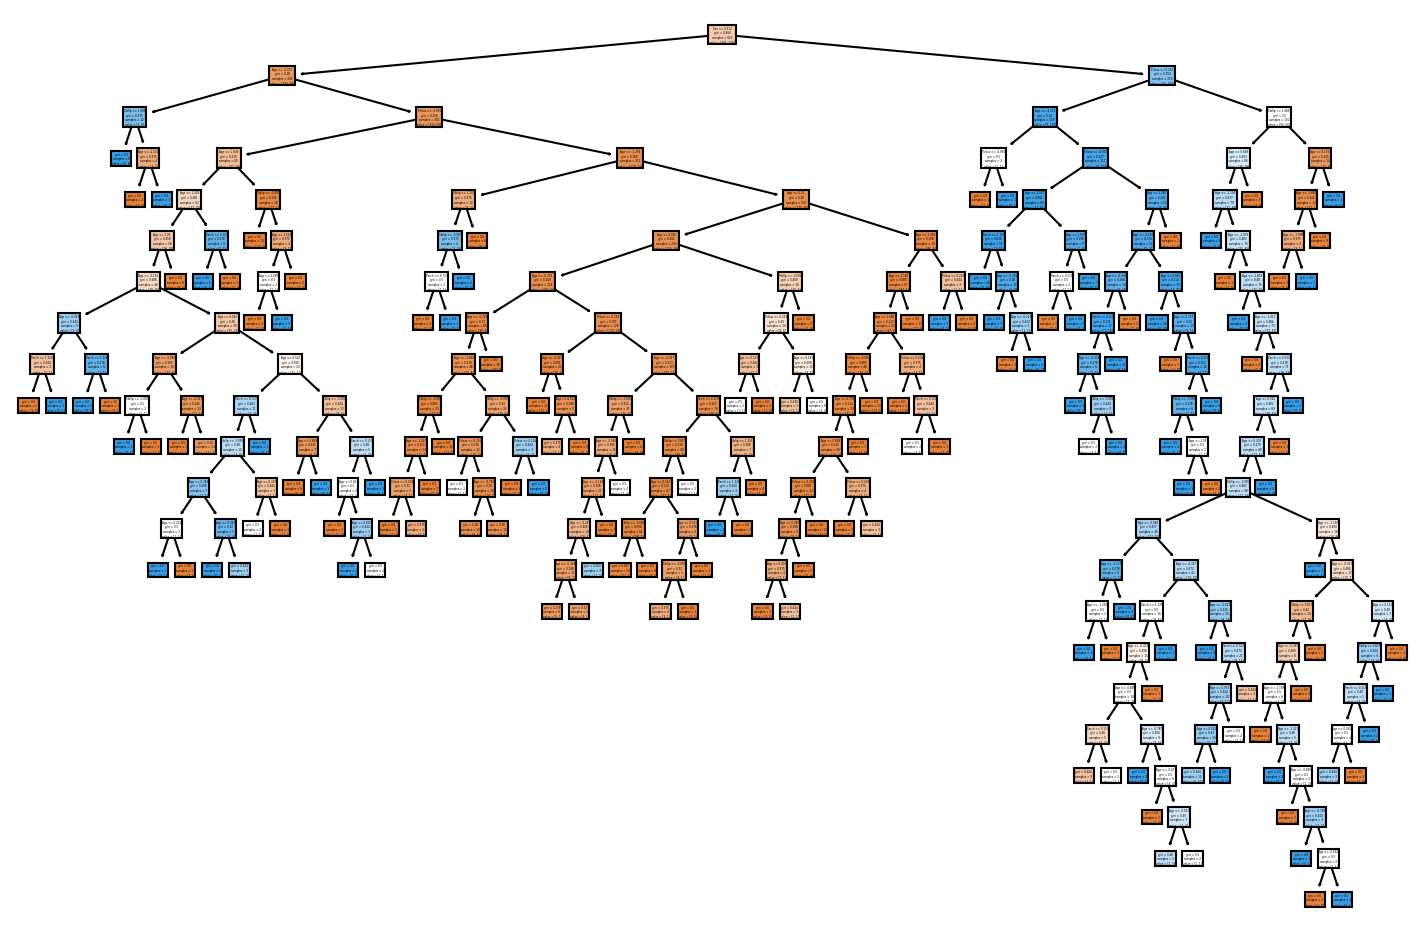

In [28]:
# The decision trees visualization

from sklearn.tree import plot_tree


plt.figure(figsize=(12,8),dpi=150)
plot_tree(decisiontree_model,filled=True,feature_names=X.columns);